# DL Tutorial Day 7

## Digit Classification using Neural Networks

Talking about the insurance problem, where we just modeled the age and income to determine if a person will buy insurance or not, we can add additional features like education and savings to have a better model. We can map these inputs to other features like awareness and affordability to finally determine if a person buys the insurance or not. The following image shows the typical structure of a neural network.

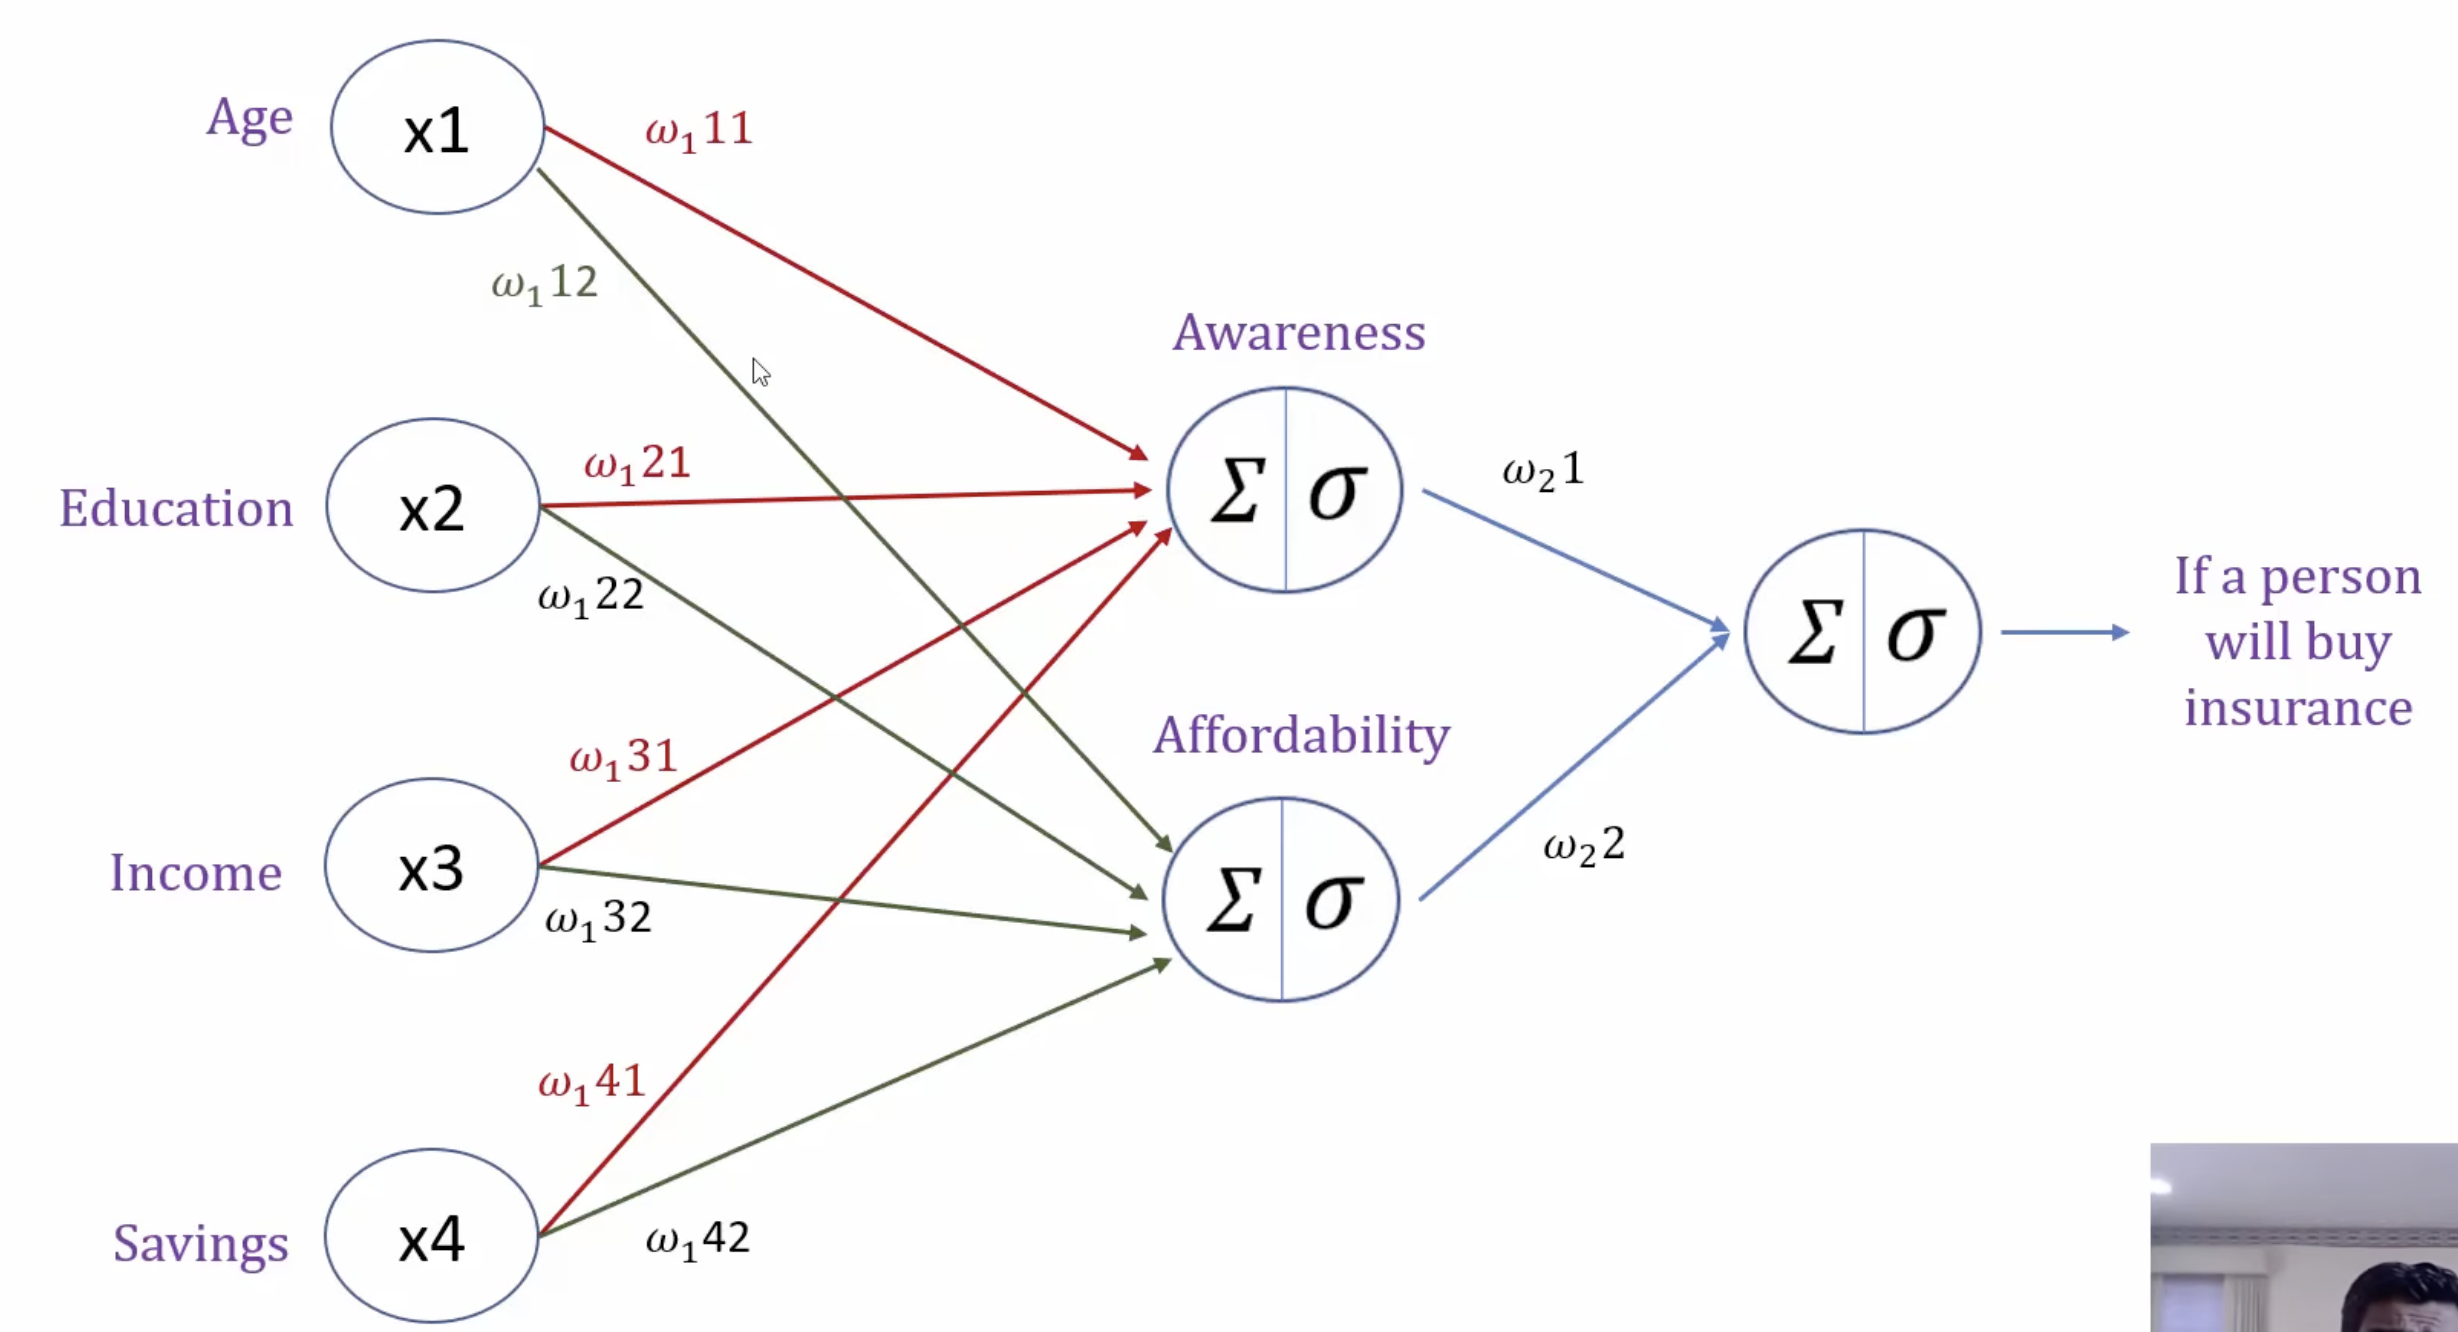

For the digits classification problem, the idea is to feed the image of '2' to the input neurons and have 10 output neurons (because we have 10 possible values of a digit) and the neuron with the highest score is said to be the digit.

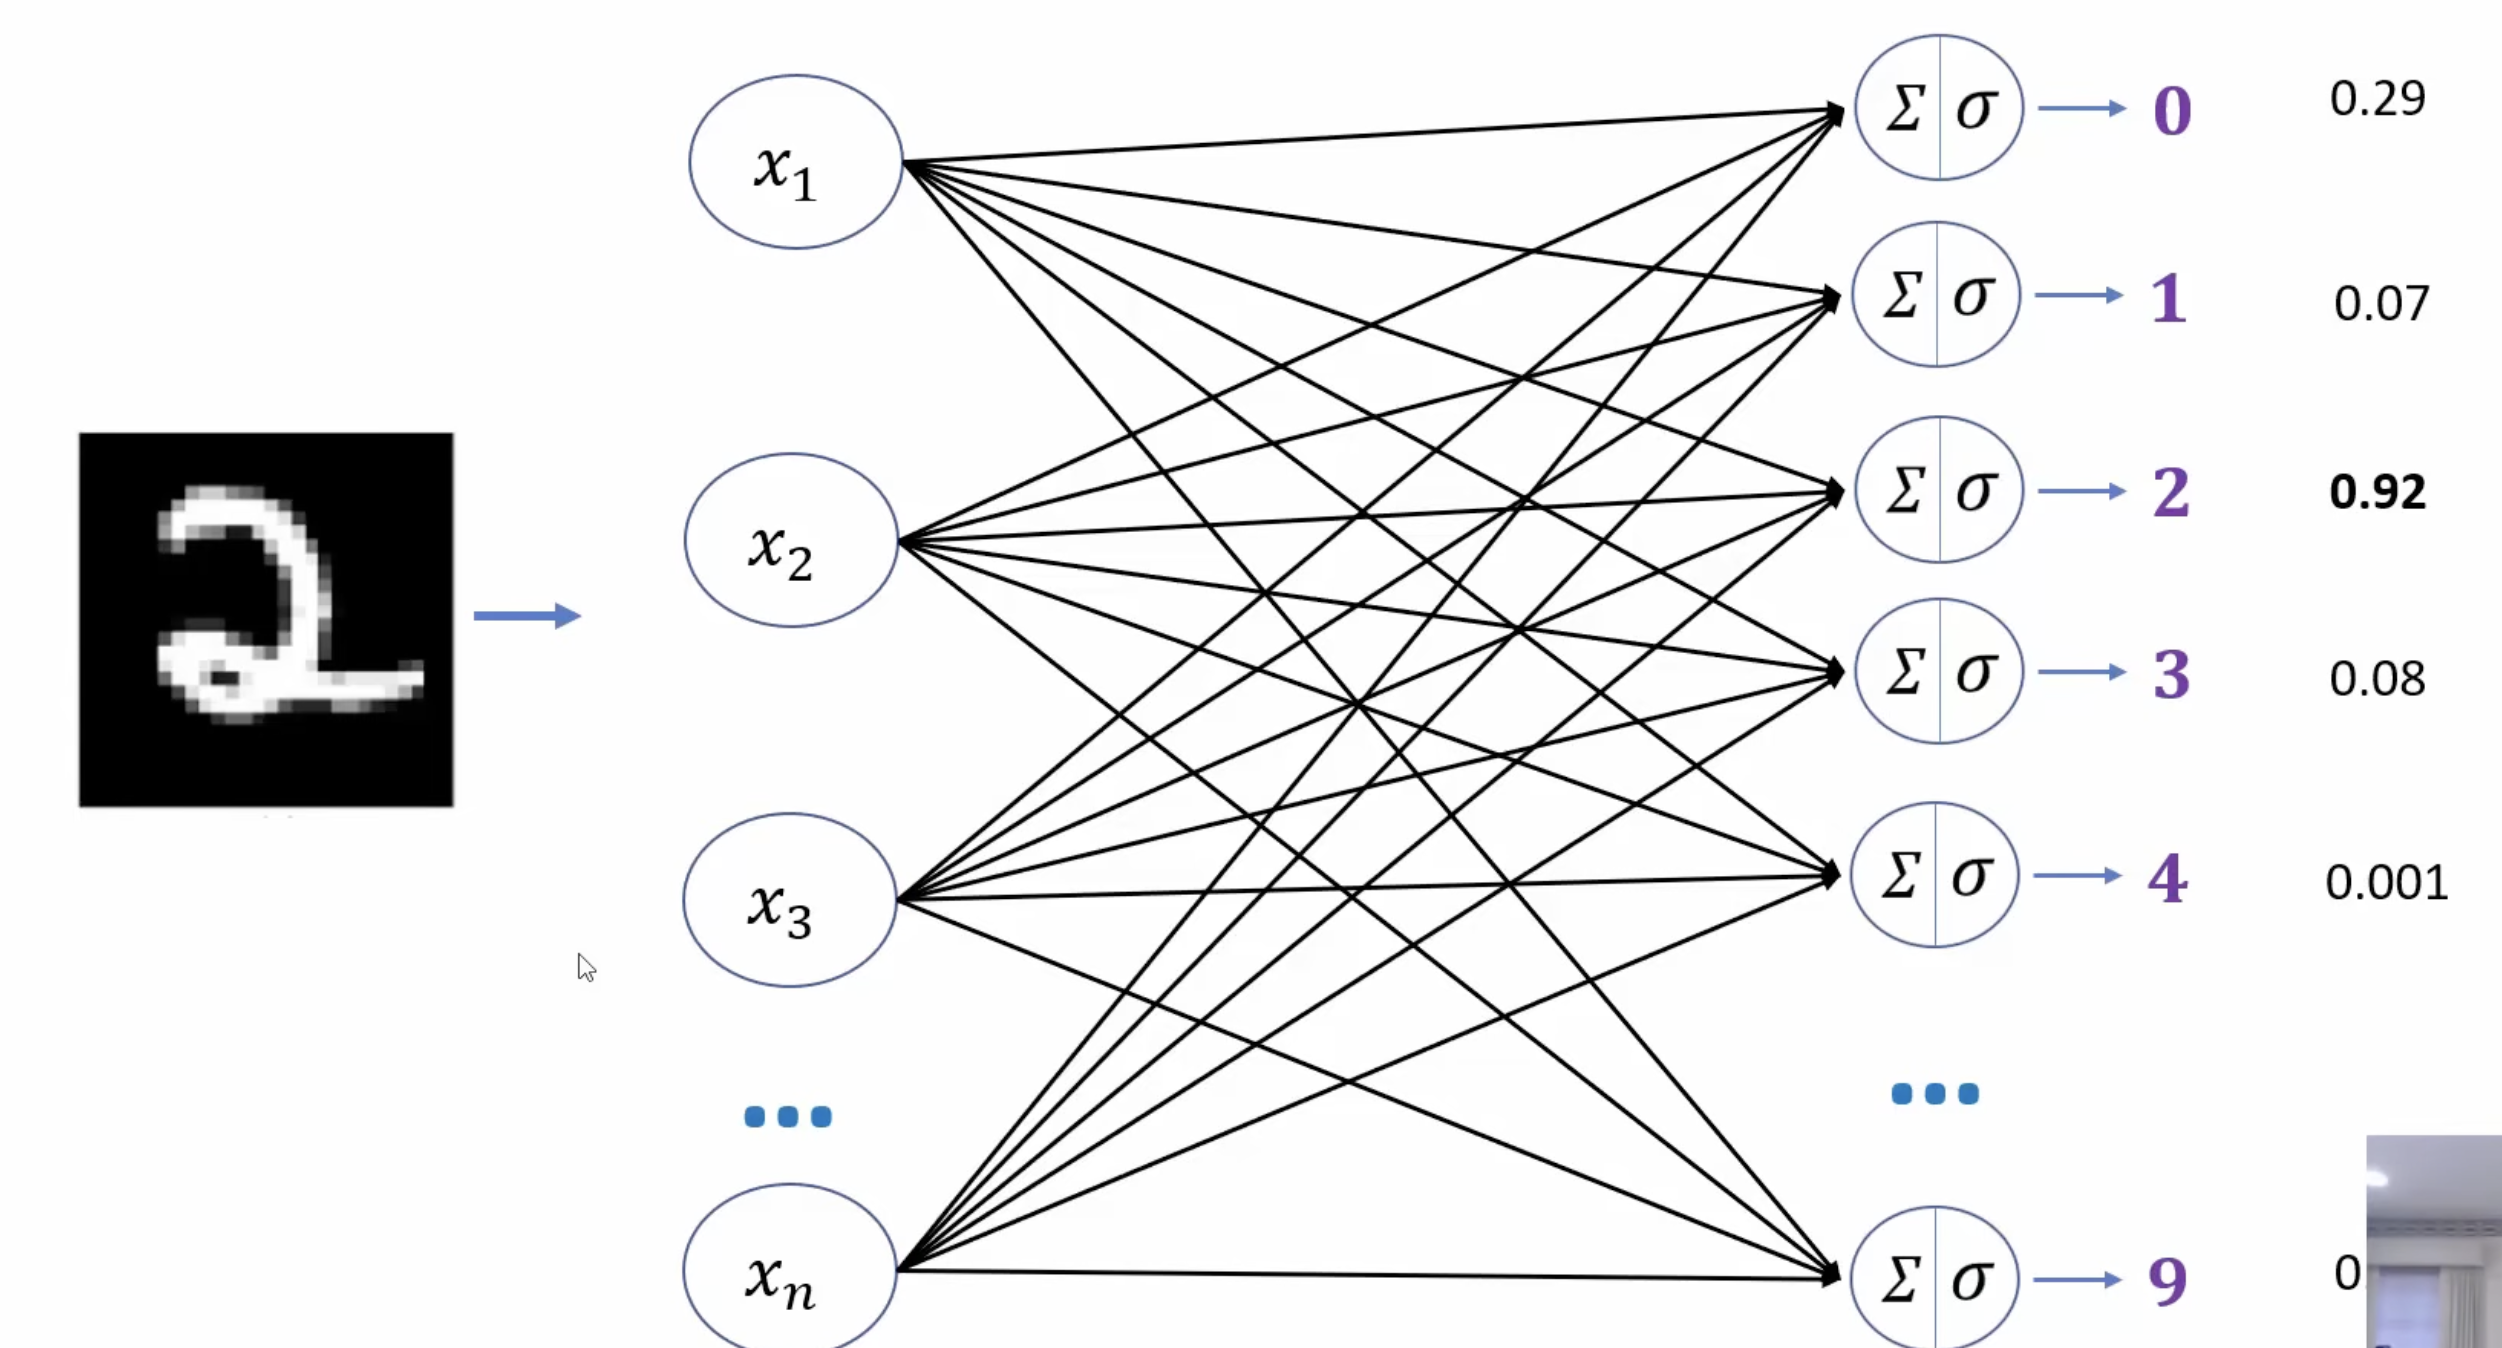

Each image is a matrix with values from 0 meaning black to 255 meaning white. Our matrix is of 28x28 dimension. We flatten the matrix into an array and feed each value in the matrix to one neuron, and try to find the correct digit.

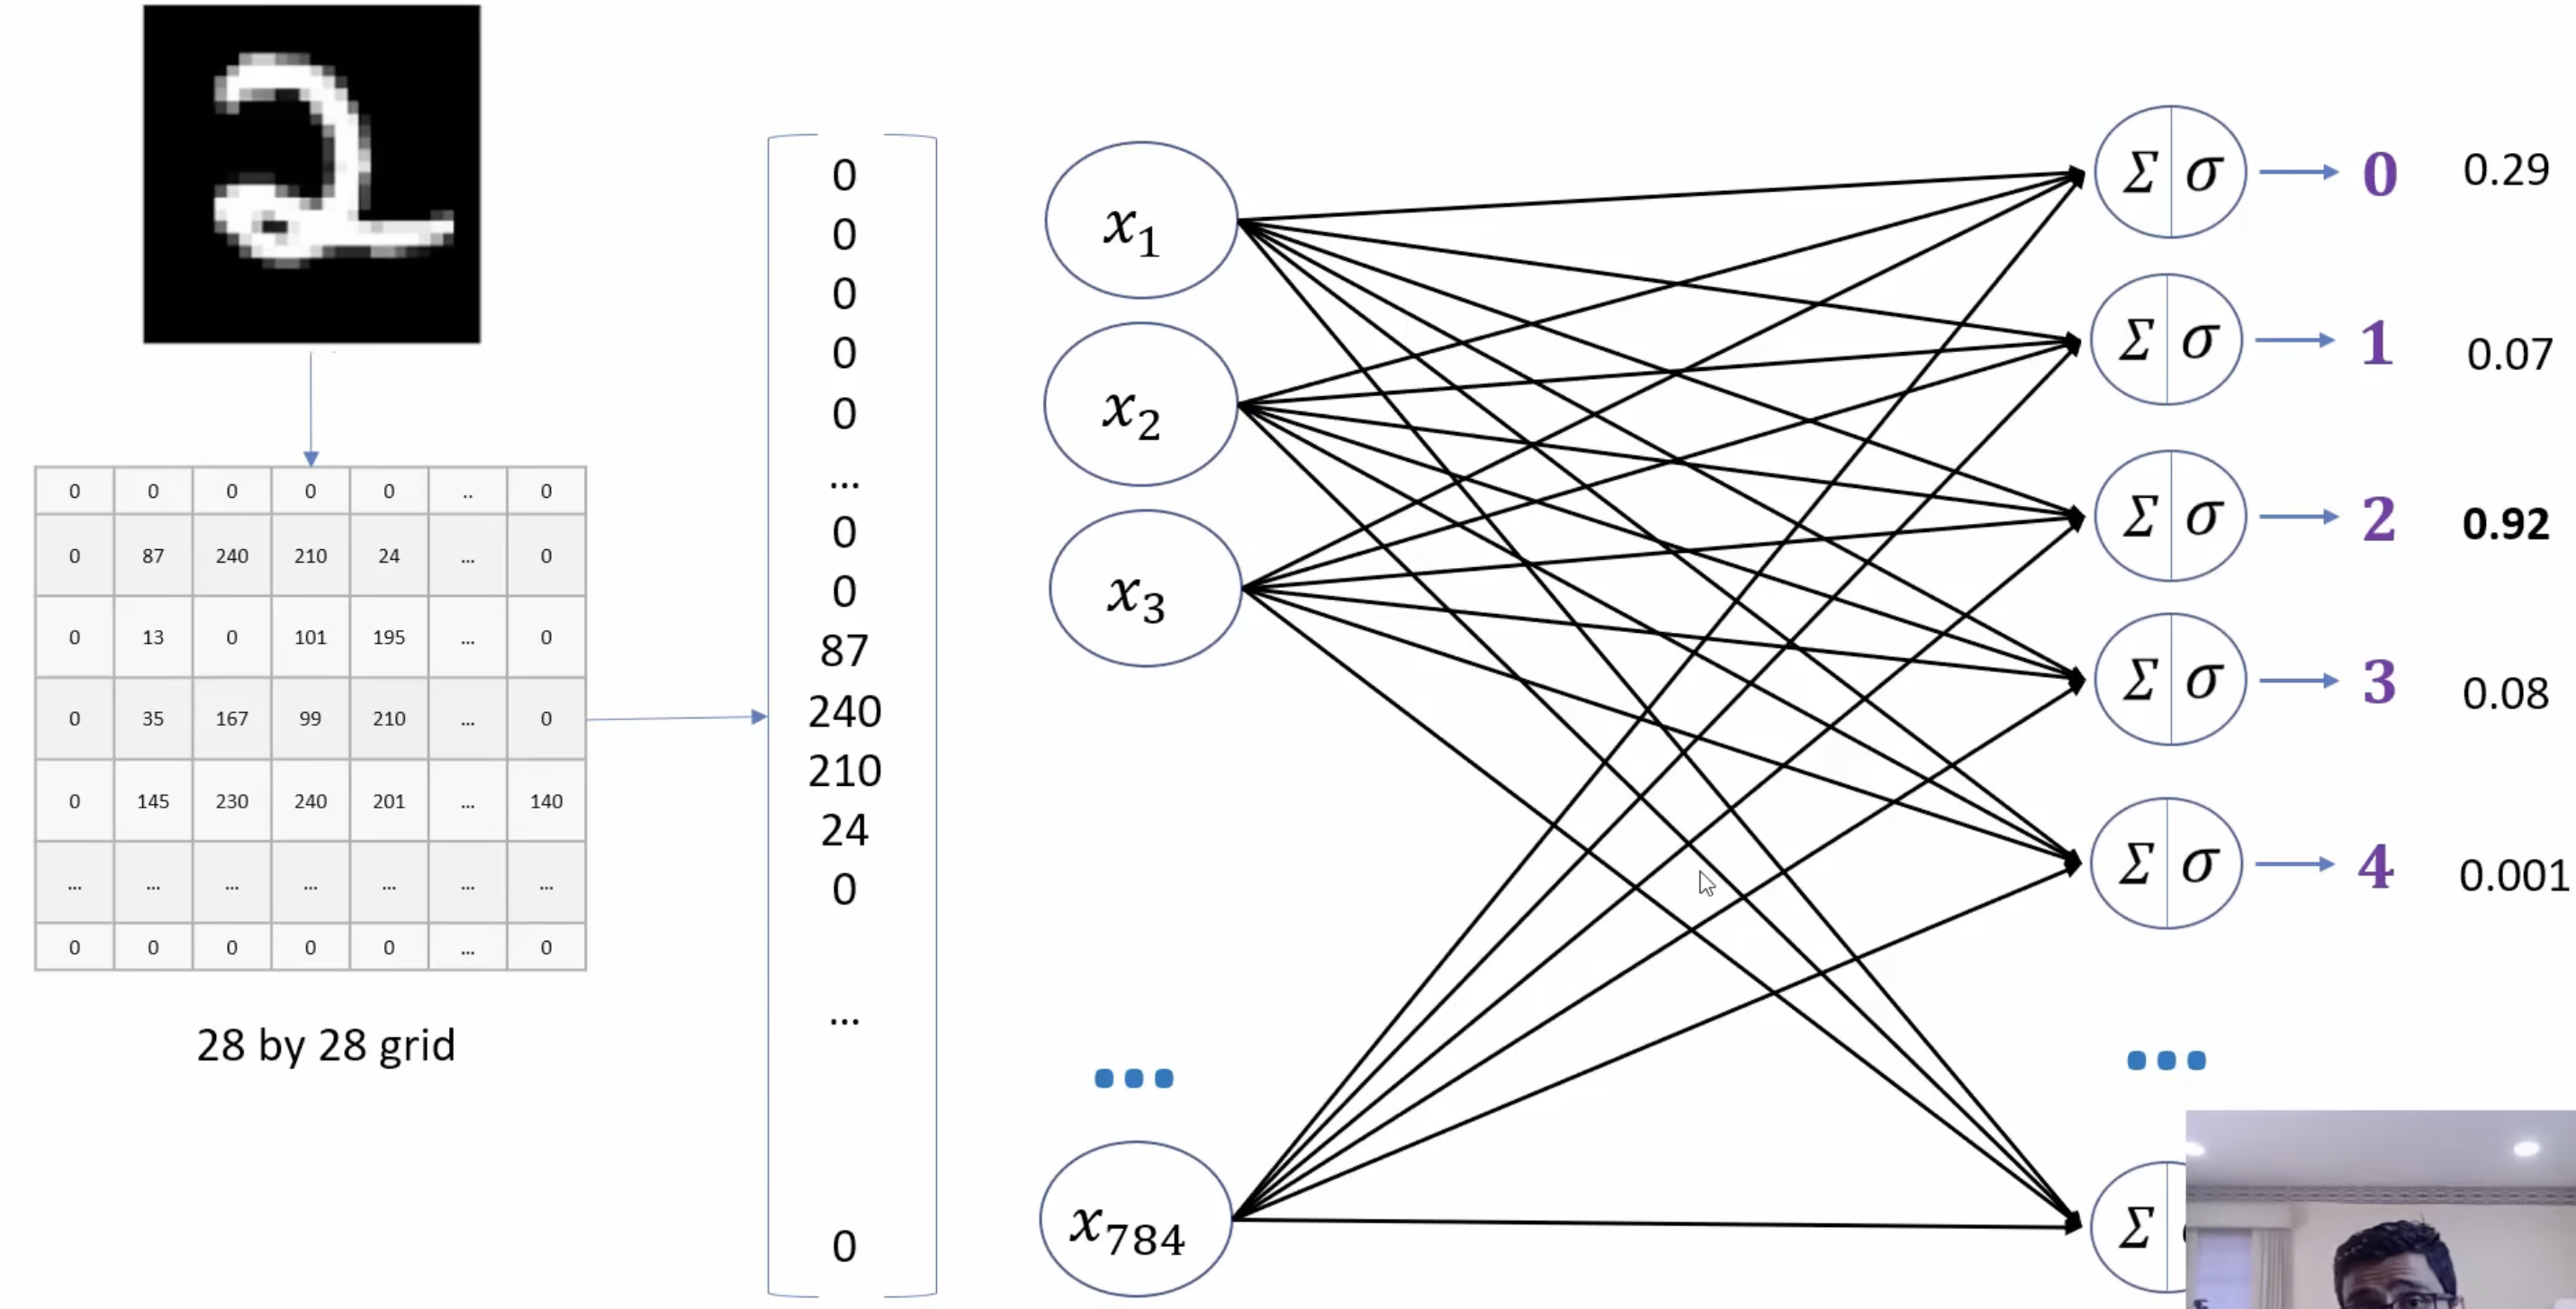

In [ ]:
# importing relevant libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# loading the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [93]:
# checking the dataset
print(len(X_train))
print(len(X_test))
print(X_train[0].shape)
print(X_train[0])

60000
10000
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 2

In [94]:
# retrospective scaling
X_train = X_train/255
X_test = X_test/255

np.uint8(0)

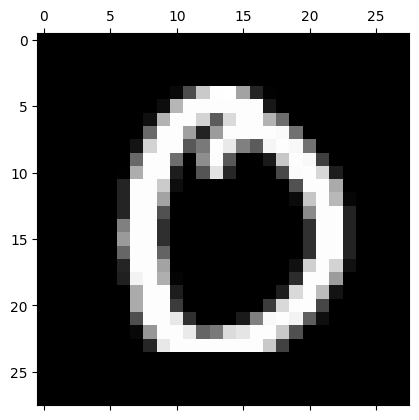

In [95]:
# visualising images
plt.matshow(X_train[88])
y_train[88]

In [96]:
# flattening the 2D matrix into a 1D array
X_train_flattened = X_train.reshape(len(X_train), X_train.shape[1]*X_train.shape[1])
X_test_flattened = X_test.reshape(len(X_test), X_test.shape[1]*X_test.shape[1])

X_train_flattened.shape

(60000, 784)

In [97]:
# building and compiling the network
model = keras.Sequential([
    # dense mean that all the neurons in layer n are connected to all the neurons in layer n+1
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# fitting the model
model.fit(X_train_flattened, y_train, epochs = 5)

# we got 47% accuracy and we suspect that we need to scale our values

Epoch 1/5
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 3:54 125ms/step - accuracy: 0.1562 - loss: 2.2543

/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 244us/step - accuracy: 0.8791 - loss: 0.4655
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.9154 - loss: 0.3033
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.9205 - loss: 0.2827
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.9237 - loss: 0.2734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.9263 - loss: 0.2667


In [98]:
# testing the model
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.9252 - loss: 0.2712


[0.27122926712036133, 0.9251999855041504]

In [99]:
# making predictions
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step


1


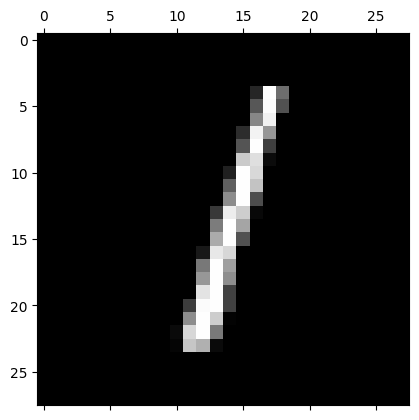

In [100]:
# printing the predicted and actual value
image = 2
print(np.argmax(y_predicted[image]))
plt.matshow(X_test[image])

In [101]:
# converting y_predicted into actual integer data
y_predicted_label = [np.argmax(i) for i in y_predicted]
confm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)

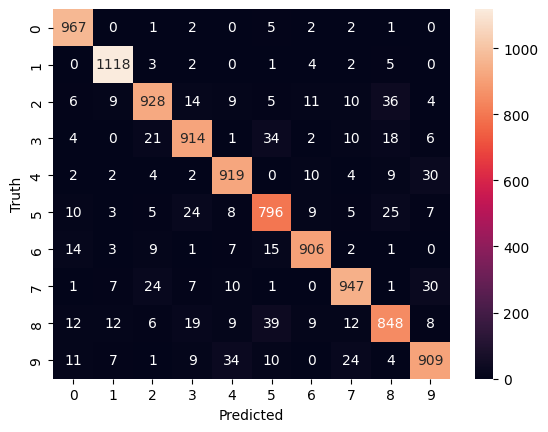

In [102]:
# creating the confusion matrix
import seaborn as sn
sn.heatmap(confm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [103]:
# building and compiling a new network with hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# fitting the model
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5


/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - accuracy: 0.9229 - loss: 0.2730
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.9636 - loss: 0.1232
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.9741 - loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.9798 - loss: 0.0673
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.9836 - loss: 0.0531


In [104]:
# evaluating the performance
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.9749 - loss: 0.0842


[0.08423691242933273, 0.9749000072479248]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step


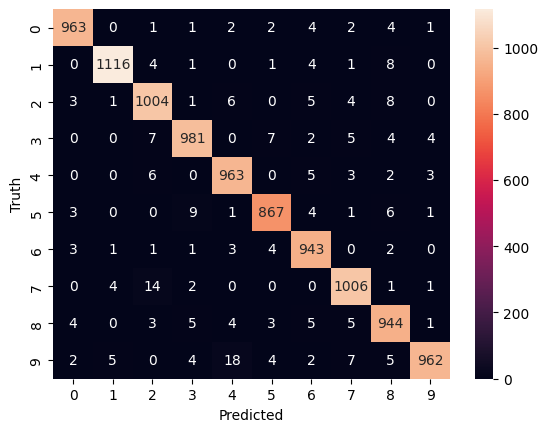

In [105]:
# making predictions
y_predicted = model.predict(X_test_flattened)

# converting y_predicted into actual integer data
y_predicted_label = [np.argmax(i) for i in y_predicted]
confm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)

# creating the confusion matrix
import seaborn as sn
sn.heatmap(confm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [106]:
# if we don't want to create the flattened arrays

# building and compiling a new network with hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# fitting the model
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5


/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.9243 - loss: 0.2665
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.9653 - loss: 0.1184
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.9750 - loss: 0.0816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.9815 - loss: 0.0619
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - accuracy: 0.9856 - loss: 0.0491
